<a href="https://colab.research.google.com/github/ErikkaJ/CS103_Parrenas/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
#packages
import numpy as np
import pandas as pd
from pandas import read_csv

In [ ]:
from pandas import read_csv
from pandas import set_option

filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv("/gdrive/MyDrive/Colab Notebooks/pima-indians-diabetes.csv")

peek = data.head(20)
print(peek)

    preg  plas  pres  skin  test  mass   pedi  age  class
0      6   148    72    35     0  33.6  0.627   50      1
1      1    85    66    29     0  26.6  0.351   31      0
2      8   183    64     0     0  23.3  0.672   32      1
3      1    89    66    23    94  28.1  0.167   21      0
4      0   137    40    35   168  43.1  2.288   33      1
5      5   116    74     0     0  25.6  0.201   30      0
6      3    78    50    32    88  31.0  0.248   26      1
7     10   115     0     0     0  35.3  0.134   29      0
8      2   197    70    45   543  30.5  0.158   53      1
9      8   125    96     0     0   0.0  0.232   54      1
10     4   110    92     0     0  37.6  0.191   30      0
11    10   168    74     0     0  38.0  0.537   34      1
12    10   139    80     0     0  27.1  1.441   57      0
13     1   189    60    23   846  30.1  0.398   59      1
14     5   166    72    19   175  25.8  0.587   51      1
15     7   100     0     0     0  30.0  0.484   32      1
16     0   118

The datasets has 768 rows and 9 columns.

In [ ]:
#shape
shape = data.shape
print(shape)

(769, 9)


In [ ]:
#Discriptive Analysis
data.describe()
data.describe(include='all')



,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.105,20.536,79.799,31.993,0.472,33.241,0.349
std,3.370,31.973,19.356,15.952,115.244,7.884,0.331,11.760,0.477
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


In [ ]:
#Class Distribution
class_counts = data.groupby('class').size()
print(class_counts)

class
0.0    500
1.0    268
dtype: int64


Class Destribution

preg     object
plas     object
pres     object
skin     object
test     object
mass     object
pedi     object
age      object
class    object
dtype: object


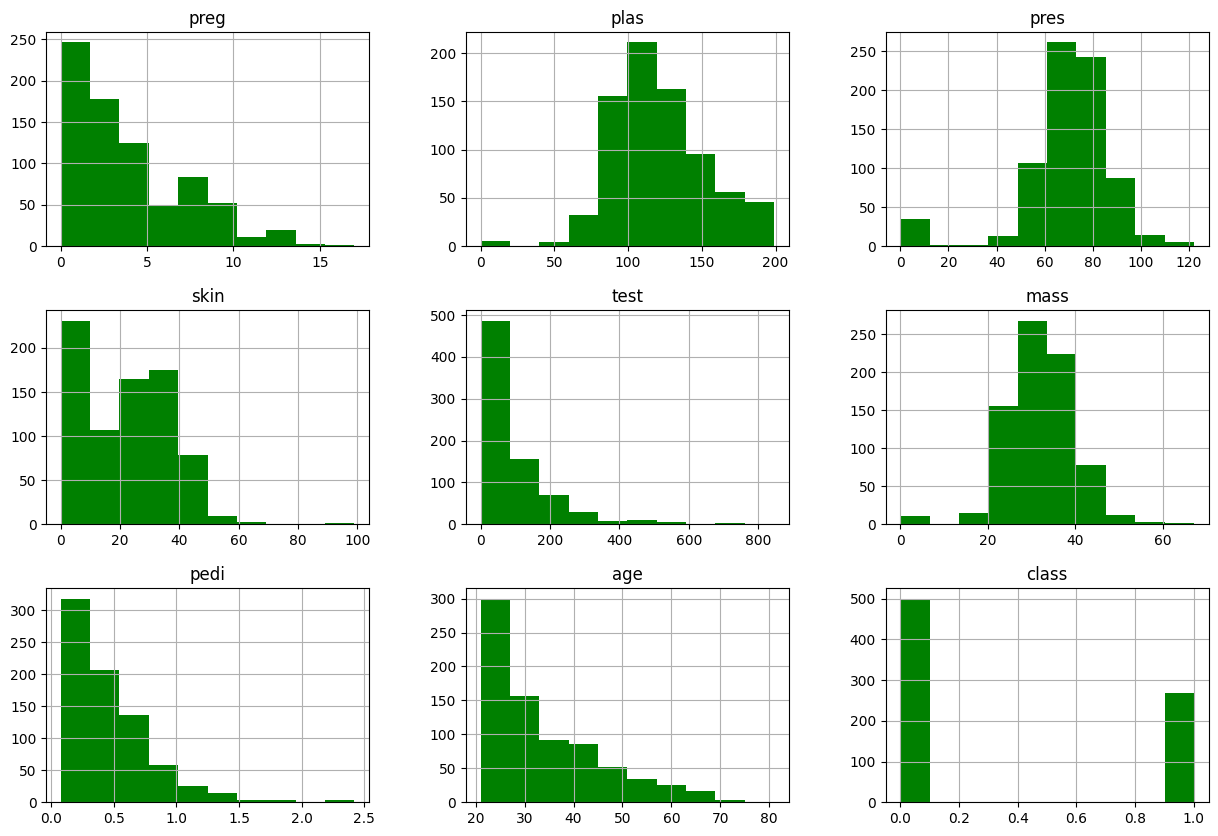

In [ ]:
#Data Type
print(data.dtypes)

import pandas as pd

for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

data = data.dropna()

#Graph
from matplotlib import pyplot

pyplot.rcParams["figure.figsize"] = (15, 10)
data.hist(color = "green")
pyplot.show()

        preg   plas   pres   skin   test   mass   pedi    age  class
preg   1.000  0.129  0.141 -0.082 -0.074  0.018 -0.034  0.544  0.222
plas   0.129  1.000  0.153  0.057  0.331  0.221  0.137  0.264  0.467
pres   0.141  0.153  1.000  0.207  0.089  0.282  0.041  0.240  0.065
skin  -0.082  0.057  0.207  1.000  0.437  0.393  0.184 -0.114  0.075
test  -0.074  0.331  0.089  0.437  1.000  0.198  0.185 -0.042  0.131
mass   0.018  0.221  0.282  0.393  0.198  1.000  0.141  0.036  0.293
pedi  -0.034  0.137  0.041  0.184  0.185  0.141  1.000  0.034  0.174
age    0.544  0.264  0.240 -0.114 -0.042  0.036  0.034  1.000  0.238
class  0.222  0.467  0.065  0.075  0.131  0.293  0.174  0.238  1.000


<Axes: >

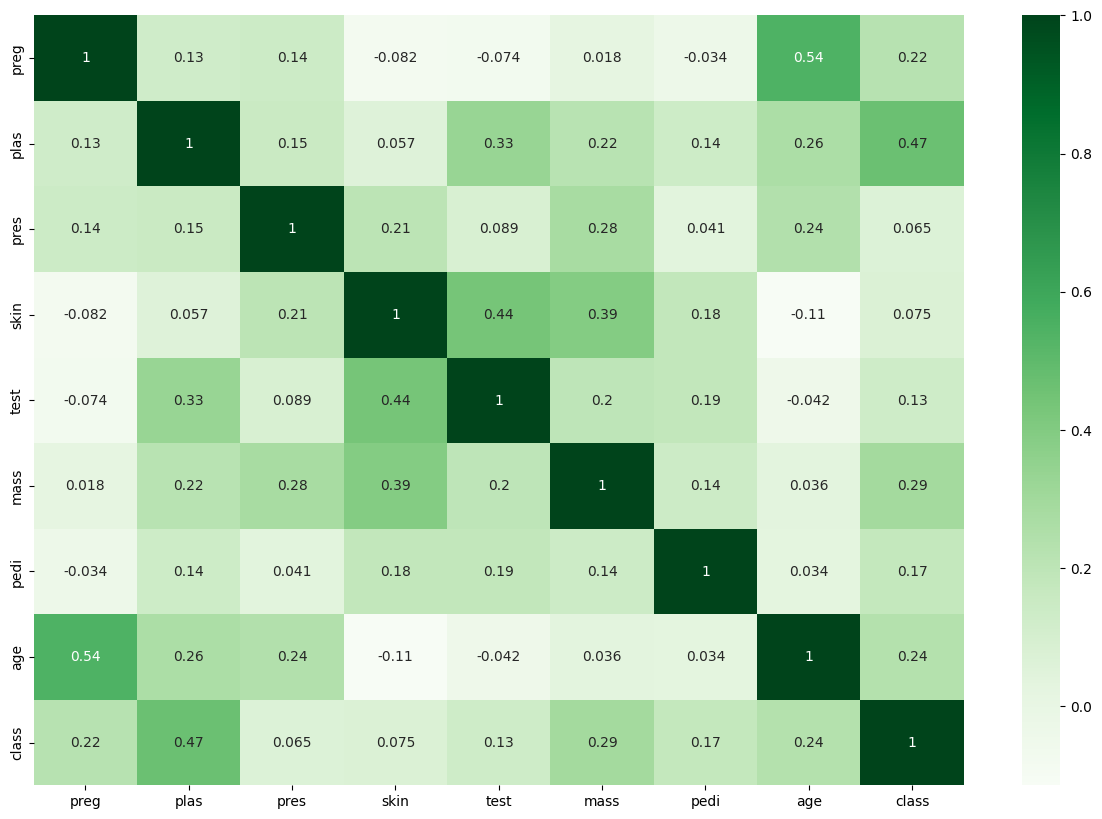

In [ ]:
#Correlation
correlations = data.corr(method='pearson')
type(correlations)
print(correlations)

import seaborn as sns
sns.heatmap(correlations, annot=True, cmap='Greens')


The heatmap shows a modest positive connection (0.54) between preg (number of pregnancies) and age, suggesting that older age is typically linked with more pregnancies. Additionally, there is a positive correlation of 0.33 between test and plas (plasma glucose), indicating that greater glucose levels are often associated with better test scores. Numerous additional characteristics, such as pedi (pedigree) and pres (blood pressure), exhibit weak associations (e.g., 0.041), indicating that they do not significantly affect one another. This heatmap is helpful in determining which traits are distinct and which may be similar, which is important for data analysis and model creation.

preg     0.902
plas     0.174
pres    -1.844
skin     0.109
test     2.272
mass    -0.429
pedi     1.920
age      1.130
class    0.635
dtype: float64


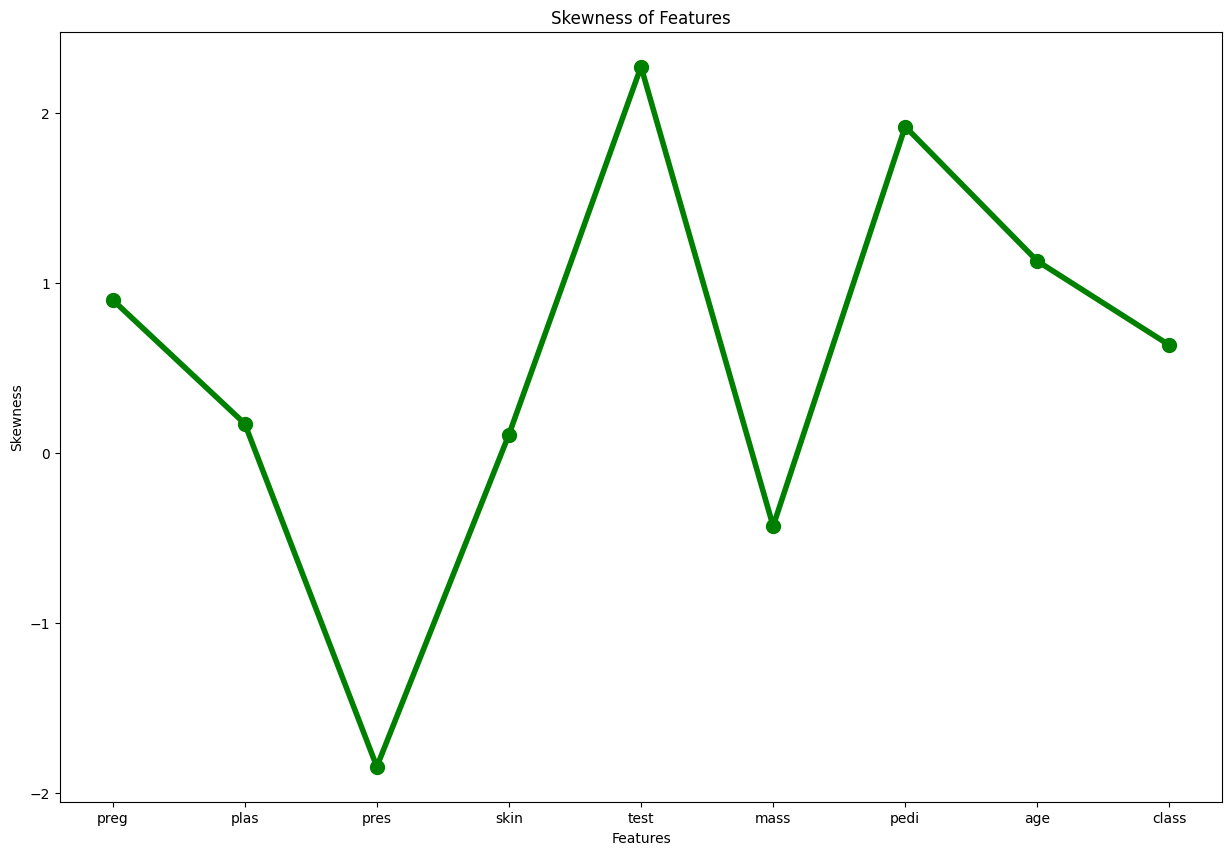

In [ ]:
#Skew


skew = data.skew()
print(skew)

data.skew().plot(kind='line', color='green', linewidth=4, marker = 'o', markersize = 10)
pyplot.title("Skewness of Features")
pyplot.xlabel("Features")
pyplot.ylabel("Skewness")
pyplot.show()

Although there is a small group with a greater prevalence of the illness, the majority of people in the datasets do not have diabetes, according to the outcome's minor positive skew, which is likely indicative of the condition's presence.

The test shows a strong positive skewness, as can be seen in the graph, meaning that while most results are low, some are quite high. Pres, on the other hand, has more high values due to its large negative skewness. Plas and class are examples of features that are more symmetrical because their skewness is almost zero.